In [29]:
import dill
dill.dump_session("EXP3.db")

In [1]:
import dill
dill.load_session("EXP3.db")

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split



In [2]:
from keras.models import Sequential
from keras.layers import Conv1D, ConvLSTM2D, MaxPooling1D, Flatten, Dense, Reshape,TimeDistributed,Conv2D,BatchNormalization,MaxPooling2D,ConvLSTM1D,LSTM



In [3]:
import tensorflow as tf
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)


In [4]:
# Read CSV File
df = pd.read_csv(r"C:\Users\mujta\OneDrive\Documents\GitHub\F20PA-DriverDrowsinessDetection\Experiments\mergedEMYA_min_max_normEMYA.csv")

In [5]:
df.drop(columns=["Unnamed: 0","Angle","Part_ID"],inplace=True)

In [6]:
df

,Label,EAR,MAR,MOE
0,0,0.695510,0.616864,0.391060
1,0,0.710750,0.609890,0.380033
2,0,0.700934,0.642625,0.404756
3,0,0.759520,0.620259,0.365998
4,0,0.707608,0.535723,0.335285
...,...,...,...,...
422995,10,0.502563,0.621765,0.360100
422996,10,0.471807,0.654889,0.392917
422997,10,0.543209,0.610680,0.328816
422998,10,0.573772,0.636166,0.316251


In [7]:
int(df.shape[0]/5)

84600

In [8]:

from sklearn.metrics import precision_recall_fscore_support
# Function to get precision, recall, and F1 scores
def getPerformanceMetrics(model,X_test,y_test):

    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)
    
    # Compute precision, recall, and F1 score for each class
    precision, recall, f1, _ = precision_recall_fscore_support(y_test.flatten(), y_pred, average=None)
    # Lists of precision , recall, and F1 scores
    p_list = []
    r_list = []
    f_list = []
    # Print precision, recall, and F1 score for each class
    for i in range(len(precision)):
        p_list.append(precision[i])
        r_list.append(recall[i])
        f_list.append(f1[i])
        print(f"Class {i}:")
        print(f"  Precision: {precision[i]}")
        print(f"  Recall: {recall[i]}")
        print(f"  F1 Score: {f1[i]}")
    # Print Average values
    print(f"Avg Precision:{np.average(p_list)}")
    print(f"Avg Recall:{np.average(r_list)}")
    print(f"Avg F1 Score:{np.average(f_list)}")


In [9]:
# Function to set parameters and train model.
# Returns model, and test sets.
def compileModel(data,timestep,test_size,num_epochs):
    # Separate labels
    y=data["Label"]
    data = data.drop(columns=['Label'])
    # Reshape according to timestep
    df_reshaped = np.array(data).reshape(int(data.shape[0]/timestep),timestep,3)
    y = np.array(y)
    y_reshaped  = []
    for i in range(0, len(y), timestep):
        y_reshaped.append([y[i]])
    # Create test and  train sets.
    X_train, X_test, y_train, y_test = train_test_split(df_reshaped, y_reshaped, test_size=test_size, random_state=42)

    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train= np.array(y_train)
    y_test = np.array(y_test)
    # Set labels as  0,1,2
    for i in range(0,len(y_train)):
        y_train[i]=int(y_train[i]/5)
    for i in range(0,len(y_test)):
        y_test[i]=int(y_test[i]/5)
    # Define model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(timestep, 3)))
    model.add(MaxPooling1D(pool_size=2))

    model.add(LSTM(64, return_sequences=True))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation='softmax'))  

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=num_epochs, batch_size=32, validation_split=0.2)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print("Accuracy:", accuracy)
    getPerformanceMetrics(model,X_test,y_test)
    return model, X_test, y_test






## Increase timestep 5,10,20

In [10]:
modelA , X_testA, y_testA = compileModel(data=df,
                                         timestep=5,
                                         test_size=0.2,
                                         num_epochs=50)




Epoch 1/50


1692/1692 [==============================] - 9s 4ms/step - loss: 1.0577 - accuracy: 0.4232 - val_loss: 1.0382 - val_accuracy: 0.4291
Epoch 2/50
1692/1692 [==============================] - 6s 3ms/step - loss: 1.0261 - accuracy: 0.4522 - val_loss: 1.0101 - val_accuracy: 0.4754
Epoch 3/50
1692/1692 [==============================] - 7s 4ms/step - loss: 1.0000 - accuracy: 0.4906 - val_loss: 0.9892 - val_accuracy: 0.4866
Epoch 4/50
1692/1692 [==============================] - 7s 4ms/step - loss: 0.9851 - accuracy: 0.5038 - val_loss: 0.9690 - val_accuracy: 0.5228
Epoch 5/50
1692/1692 [==============================] - 7s 4ms/step - loss: 0.9699 - accuracy: 0.5205 - val_loss: 0.9528 - val_accuracy: 0.5406
Epoch 6/50
1692/1692 [==============================] - 7s 4ms/step - loss: 0.9542 - accuracy: 0.5331 - val_loss: 0.9355 - val_accuracy: 0.5549
Epoch 7/50
1692/1692 [==============================] - 5s 3ms/step - loss: 0.9421 - accuracy: 0.5424 - val_loss: 0.9213 - val_accu

In [11]:
modelA.save("modelA.h5")

c:\Users\mujta\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
modelB , X_testB, y_testB = compileModel(data=df,
                                         timestep=10,
                                         test_size=0.2,
                                         num_epochs=50)

Epoch 1/50
846/846 [==============================] - 11s 7ms/step - loss: 1.0560 - accuracy: 0.4226 - val_loss: 1.0361 - val_accuracy: 0.4309
Epoch 2/50
846/846 [==============================] - 5s 6ms/step - loss: 1.0271 - accuracy: 0.4513 - val_loss: 1.0125 - val_accuracy: 0.4767
Epoch 3/50
846/846 [==============================] - 4s 5ms/step - loss: 1.0106 - accuracy: 0.4728 - val_loss: 1.0049 - val_accuracy: 0.4672
Epoch 4/50
846/846 [==============================] - 4s 5ms/step - loss: 0.9917 - accuracy: 0.4924 - val_loss: 0.9953 - val_accuracy: 0.5132
Epoch 5/50
846/846 [==============================] - 4s 5ms/step - loss: 0.9715 - accuracy: 0.5173 - val_loss: 0.9596 - val_accuracy: 0.5188
Epoch 6/50
846/846 [==============================] - 4s 5ms/step - loss: 0.9490 - accuracy: 0.5343 - val_loss: 0.9403 - val_accuracy: 0.5331
Epoch 7/50
846/846 [==============================] - 4s 5ms/step - loss: 0.9399 - accuracy: 0.5414 - val_loss: 0.9312 - val_accuracy: 0.5579
Epoch

In [13]:
modelB.save("modelB.h5")

c:\Users\mujta\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
modelC , X_testC, y_testC = compileModel(data=df,
                                         timestep=20,
                                         test_size=0.2,
                                         num_epochs=50)

Epoch 1/50
423/423 [==============================] - 6s 8ms/step - loss: 1.0578 - accuracy: 0.4250 - val_loss: 1.0487 - val_accuracy: 0.4270
Epoch 2/50
423/423 [==============================] - 3s 6ms/step - loss: 1.0329 - accuracy: 0.4427 - val_loss: 1.0256 - val_accuracy: 0.4453
Epoch 3/50
423/423 [==============================] - 3s 7ms/step - loss: 1.0204 - accuracy: 0.4587 - val_loss: 1.0023 - val_accuracy: 0.4728
Epoch 4/50
423/423 [==============================] - 3s 7ms/step - loss: 1.0090 - accuracy: 0.4706 - val_loss: 0.9830 - val_accuracy: 0.5024
Epoch 5/50
423/423 [==============================] - 3s 6ms/step - loss: 0.9884 - accuracy: 0.4915 - val_loss: 0.9618 - val_accuracy: 0.5281
Epoch 6/50
423/423 [==============================] - 4s 8ms/step - loss: 0.9762 - accuracy: 0.5109 - val_loss: 0.9498 - val_accuracy: 0.5455
Epoch 7/50
423/423 [==============================] - 3s 7ms/step - loss: 0.9550 - accuracy: 0.5270 - val_loss: 0.9634 - val_accuracy: 0.5124
Epoch 

In [15]:
modelC.save("modelC.h5")

c:\Users\mujta\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Since Model B has best performance use that to experiment with num epochs

In [16]:
modelD , X_testD, y_testD = compileModel(data=df,
                                         timestep=10,
                                         test_size=0.2,
                                         num_epochs=75)

Epoch 1/75
846/846 [==============================] - 7s 5ms/step - loss: 1.0547 - accuracy: 0.4271 - val_loss: 1.0351 - val_accuracy: 0.4342
Epoch 2/75
846/846 [==============================] - 4s 5ms/step - loss: 1.0237 - accuracy: 0.4561 - val_loss: 1.0069 - val_accuracy: 0.4787
Epoch 3/75
846/846 [==============================] - 4s 5ms/step - loss: 1.0047 - accuracy: 0.4781 - val_loss: 0.9999 - val_accuracy: 0.4787
Epoch 4/75
846/846 [==============================] - 4s 5ms/step - loss: 0.9784 - accuracy: 0.5045 - val_loss: 0.9696 - val_accuracy: 0.5287
Epoch 5/75
846/846 [==============================] - 4s 5ms/step - loss: 0.9574 - accuracy: 0.5266 - val_loss: 0.9524 - val_accuracy: 0.5226
Epoch 6/75
846/846 [==============================] - 4s 5ms/step - loss: 0.9346 - accuracy: 0.5461 - val_loss: 0.9343 - val_accuracy: 0.5464
Epoch 7/75
846/846 [==============================] - 4s 5ms/step - loss: 0.9242 - accuracy: 0.5543 - val_loss: 0.9106 - val_accuracy: 0.5691
Epoch 

In [17]:
modelD.save("modelD.h5")

c:\Users\mujta\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
modelE , X_testE, y_testE = compileModel(data=df,
                                         timestep=10,
                                         test_size=0.2,
                                         num_epochs=100)

Epoch 1/100
846/846 [==============================] - 9s 7ms/step - loss: 1.0557 - accuracy: 0.4228 - val_loss: 1.0365 - val_accuracy: 0.4334
Epoch 2/100
846/846 [==============================] - 5s 6ms/step - loss: 1.0213 - accuracy: 0.4562 - val_loss: 1.0063 - val_accuracy: 0.4845
Epoch 3/100
846/846 [==============================] - 5s 5ms/step - loss: 1.0035 - accuracy: 0.4764 - val_loss: 0.9912 - val_accuracy: 0.4868
Epoch 4/100
846/846 [==============================] - 4s 5ms/step - loss: 0.9803 - accuracy: 0.5077 - val_loss: 0.9727 - val_accuracy: 0.5244
Epoch 5/100
846/846 [==============================] - 5s 5ms/step - loss: 0.9543 - accuracy: 0.5335 - val_loss: 0.9644 - val_accuracy: 0.5149
Epoch 6/100
846/846 [==============================] - 5s 6ms/step - loss: 0.9282 - accuracy: 0.5550 - val_loss: 0.9247 - val_accuracy: 0.5604
Epoch 7/100
846/846 [==============================] - 5s 6ms/step - loss: 0.9163 - accuracy: 0.5630 - val_loss: 0.9063 - val_accuracy: 0.5687

In [19]:
modelE.save("modelE.h5")

c:\Users\mujta\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Use best performance and experiment with test size

### 70-30 split

In [21]:
modelF , X_testF, y_testF = compileModel(data=df,
                                         timestep=10,
                                         test_size=0.3,
                                         num_epochs=75)

Epoch 1/75
741/741 [==============================] - 5s 4ms/step - loss: 1.0587 - accuracy: 0.4190 - val_loss: 1.0310 - val_accuracy: 0.4397
Epoch 2/75
741/741 [==============================] - 3s 4ms/step - loss: 1.0247 - accuracy: 0.4515 - val_loss: 1.0079 - val_accuracy: 0.4568
Epoch 3/75
741/741 [==============================] - 3s 4ms/step - loss: 1.0057 - accuracy: 0.4790 - val_loss: 1.0125 - val_accuracy: 0.4559
Epoch 4/75
741/741 [==============================] - 3s 4ms/step - loss: 0.9905 - accuracy: 0.4978 - val_loss: 0.9721 - val_accuracy: 0.5265
Epoch 5/75
741/741 [==============================] - 3s 4ms/step - loss: 0.9688 - accuracy: 0.5179 - val_loss: 0.9464 - val_accuracy: 0.5368
Epoch 6/75
741/741 [==============================] - 3s 4ms/step - loss: 0.9489 - accuracy: 0.5312 - val_loss: 0.9417 - val_accuracy: 0.5442
Epoch 7/75
741/741 [==============================] - 3s 4ms/step - loss: 0.9286 - accuracy: 0.5571 - val_loss: 0.9187 - val_accuracy: 0.5603
Epoch 

In [22]:
modelF.save("modelF.h5")

c:\Users\mujta\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 50-50 split

In [23]:
modelG , X_testG, y_testG = compileModel(data=df,
                                         timestep=10,
                                         test_size=0.5,
                                         num_epochs=75)

Epoch 1/75
529/529 [==============================] - 4s 5ms/step - loss: 1.0658 - accuracy: 0.4106 - val_loss: 1.0516 - val_accuracy: 0.4177
Epoch 2/75
529/529 [==============================] - 3s 6ms/step - loss: 1.0390 - accuracy: 0.4325 - val_loss: 1.0465 - val_accuracy: 0.4378
Epoch 3/75
529/529 [==============================] - 2s 4ms/step - loss: 1.0241 - accuracy: 0.4561 - val_loss: 1.0194 - val_accuracy: 0.4624
Epoch 4/75
529/529 [==============================] - 3s 5ms/step - loss: 1.0084 - accuracy: 0.4731 - val_loss: 0.9967 - val_accuracy: 0.4811
Epoch 5/75
529/529 [==============================] - 3s 5ms/step - loss: 0.9920 - accuracy: 0.4949 - val_loss: 0.9888 - val_accuracy: 0.5031
Epoch 6/75
529/529 [==============================] - 3s 6ms/step - loss: 0.9775 - accuracy: 0.5121 - val_loss: 0.9807 - val_accuracy: 0.5262
Epoch 7/75
529/529 [==============================] - 3s 6ms/step - loss: 0.9624 - accuracy: 0.5238 - val_loss: 0.9645 - val_accuracy: 0.5340
Epoch 

In [24]:
modelG.save("modelG.h5")

c:\Users\mujta\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,precision_recall_fscore_support
# Function to get plot confusion matrix along with other metrics
def getMetrics(model,X_test,y_test):
    # Get test results
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)
    conf_mat = confusion_matrix(y_test.flatten(), y_pred)
    
    # Convert instances into percentages.
    confm_percent = conf_mat.astype('float') / conf_mat.sum(axis=1).reshape(-1, 1)
    print(confm_percent)
    # Round values to 2 places
    for i in range(0,3):
        for j in range(0,3):
            confm_percent[i][j] = round(confm_percent[i][j],2)
    # Plot the confusion matrix for the results
    plt.figure(figsize=(8, 6))
    sns.heatmap(confm_percent, annot=True, fmt='g', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Compute precision, recall, and F1 score for each class
    precision, recall, f1, _ = precision_recall_fscore_support(y_test.flatten(), y_pred, average=None)

    # Print precision, recall, and F1 score for each class
    for i in range(len(precision)):
        print(f"Class {i}:")
        print(f"  Precision: {precision[i]}")
        print(f"  Recall: {recall[i]}")
        print(f"  F1 Score: {f1[i]}")


265/265 [==============================] - 1s 2ms/step
[[0.84977344 0.0899268  0.06029976]
 [0.11461318 0.78223496 0.10315186]
 [0.10253662 0.1064666  0.79099678]]


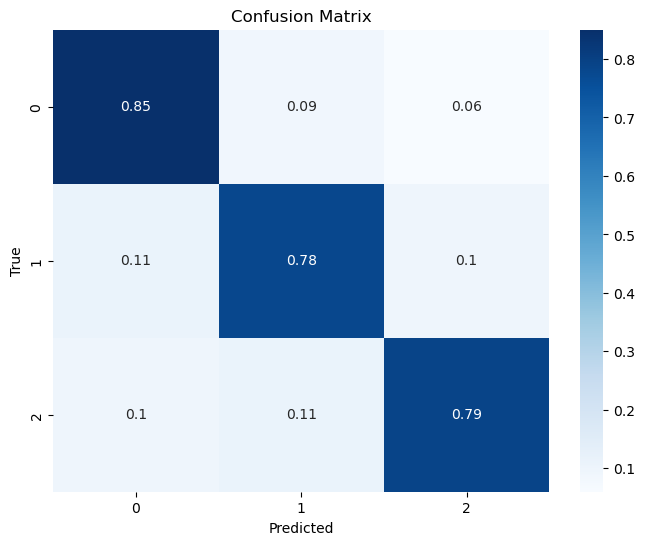

Class 0:
  Precision: 0.8006568144499179
  Recall: 0.8497734402230742
  F1 Score: 0.8244842746026377
Class 1:
  Precision: 0.7970802919708029
  Recall: 0.7822349570200573
  F1 Score: 0.789587852494577
Class 2:
  Precision: 0.8276635514018692
  Recall: 0.7909967845659164
  F1 Score: 0.8089148702959446


In [3]:
getMetrics(model=modelD,
           X_test=X_testD,
           y_test=y_testD)

661/661 [==============================] - 1s 2ms/step


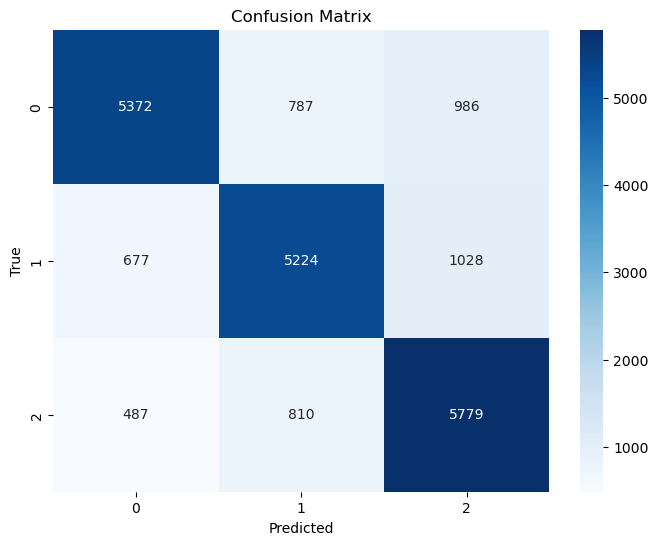

Class 0:
  Precision: 0.8219094247246022
  Recall: 0.7518544436668999
  F1 Score: 0.7853227103281923
Class 1:
  Precision: 0.7658701070224307
  Recall: 0.753932746428056
  F1 Score: 0.7598545454545454
Class 2:
  Precision: 0.7415629411009881
  Recall: 0.816704352741662
  F1 Score: 0.777321944986213


In [27]:
getMetrics(model=modelG,
           X_test=X_testG,
           y_test=y_testG)

397/397 [==============================] - 1s 2ms/step


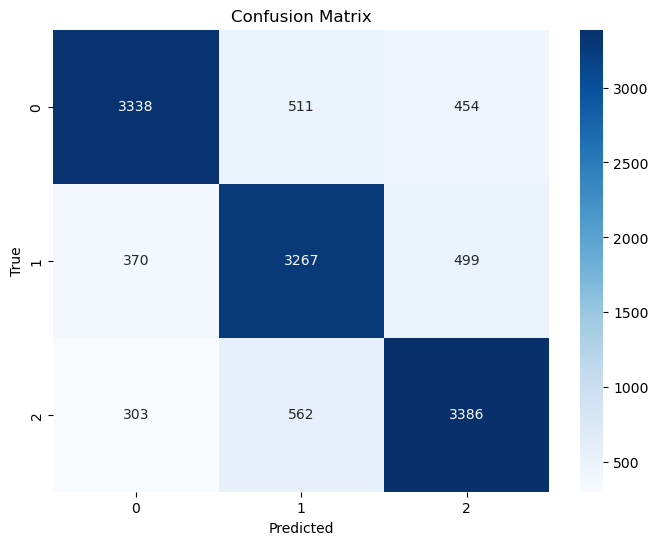

Class 0:
  Precision: 0.8322114185988532
  Recall: 0.7757378573088543
  F1 Score: 0.8029829203752706
Class 1:
  Precision: 0.7527649769585254
  Recall: 0.7898936170212766
  F1 Score: 0.7708824917413873
Class 2:
  Precision: 0.7803641392025812
  Recall: 0.7965184662432369
  F1 Score: 0.7883585564610012


In [28]:
getMetrics(model=modelF,
           X_test=X_testF,
           y_test=y_testF)